In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

%matplotlib inline

image_dir = 'C:/Users/bram_/Desktop/ig_example_photos/'


def get_colors_in_img(image):
    pixel_vals = image.reshape((-1,3))

    # Convert to float type
    pixel_vals = np.float32(pixel_vals)
    # define stopping criteria
    # you can change the number of max iterations for faster convergence!
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

    ## TODO: Select a value for k
    # then perform k-means clustering
    k = 10
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]

    # reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((image.shape))
    
    return centers, segmented_image, labels


"""
    Check color difference between two colors using CIE76 algorithm.
    Inputs: - color1: color in L*a*b* color model
            - color2: same as color1
"""
def cie76(color1, color2):
    return math.sqrt((color2[0] - color1[0])**2 + (color2[1] - color1[1])**2 + (color2[2] - color1[2])**2)


def visualize_centers(centers):
    rgb_centers = []
    for i in range(centers.shape[0]):
        rgb_centers.append(cv2.cvtColor(centers[i].reshape(1,1,3), cv2.COLOR_HSV2RGB))
    plt.imshow(np.array(rgb_centers).reshape(1,10,3))
    plt.show()


def print_pixel_percentage(centers, labels):
    bottom = 0
    for i in range(10):
        pixel_percentage = 100 * (np.count_nonzero(labels == i) / (image.shape[0] * image.shape[1]))
        plt.bar("colors", pixel_percentage, 0.4, bottom=bottom,label=f'color{i}, {round(pixel_percentage, 0)}%', color=cv2.cvtColor(centers[i].reshape(1,1,3), cv2.COLOR_HSV2RGB).reshape(3,) / 255)
        plt.title('Percentage of k cluster colors')
        plt.ylabel('% of pixels')
        bottom += pixel_percentage
    plt.legend()
    plt.show()


def get_complementary_color(color):
    comp_hue = (color[0][0][0] * 2) + 180
    print('comp_h', comp_hue)
    if (comp_hue> 360):
        comp_hue -= 360
    print(comp_hue / 2)
    return np.array([comp_hue / 2, color[0][0][1], color[0][0][2]]).reshape(1,1,3)


def get_triadic_colors(color):
    hues = []
    saturation = color[0][0][1]
    value = color[0][0][2]
    equidistance = ((360 - 3) / 3)
    color1 = color[0][0][0] * 2 + equidistance + 1
    if (color1 > 360):
        color1 -= 360
    hues.append(color1)
    color2 = hues[0] + equidistance + 1
    if (color2 > 360):
        color2 -= 360
    hues.append(color2)
    
    return np.array([[hues[0] / 2, saturation, value], [hues[1] / 2, saturation, value]]).astype('uint8')



# Kijken naar kleurcontrast
def calc_value_variance(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(image)
    print(v.shape)
    plt.hist(v.reshape(-1), bins=[0, 85, 170, 255])
    plt.title(f"Pixel count for low, mid & high brightness\nVariance:{np.var(v)}")
    plt.show()


def calc_saturation_variance(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(image)
    plt.hist(v.reshape(-1), bins=[0, 85, 170, 255])
    plt.title(f"Pixel count for low, mid & high saturation\nVariance:{np.var(s)}")
    plt.show()
    
def calc_hue_variance(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(image)
    plt.hist(h.reshape(-1), bins=range(0, 180, 5))
    plt.title(f"Pixel count for hue per 5 degrees\nVariance:{np.var(h)}")
    plt.show()
    

# Get colors in images

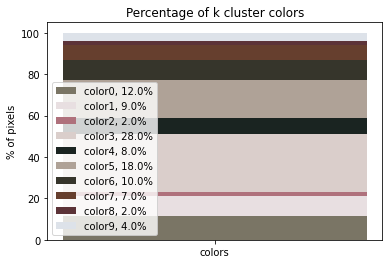

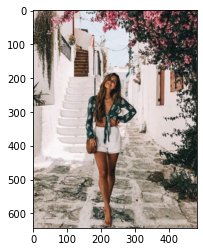

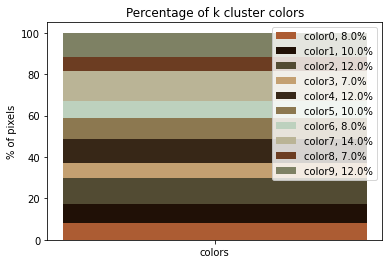

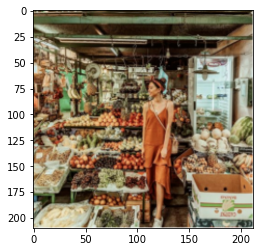

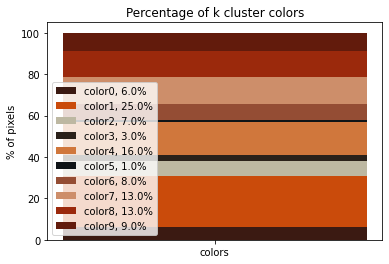

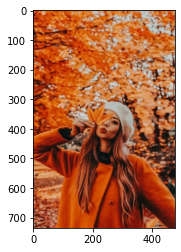

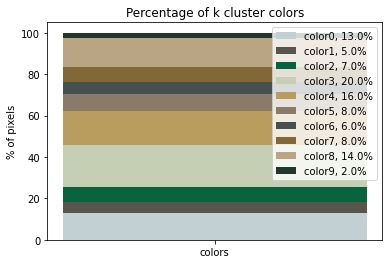

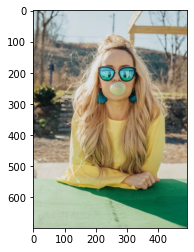

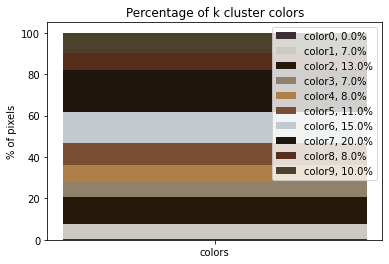

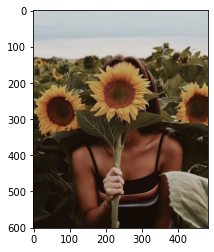

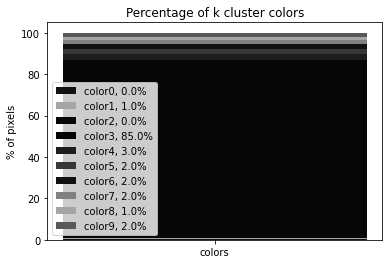

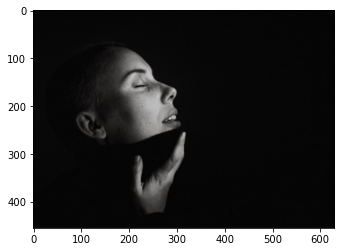

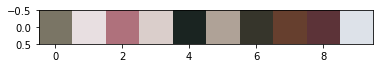

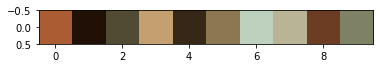

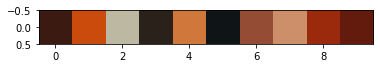

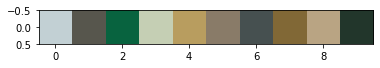

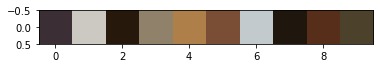

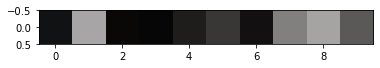

In [2]:
all_centers = []

for i in range (1,7):
    image = cv2.imread(image_dir + f'ig_example_0{i}.PNG', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    centers, segmented_image, labels = get_colors_in_img(image)
    all_centers.append(centers)
    print_pixel_percentage(centers, labels)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB))
    plt.show()
    
for centers in all_centers:
    visualize_centers(centers)

# Get intensity in image

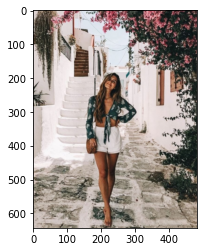

(643, 483)


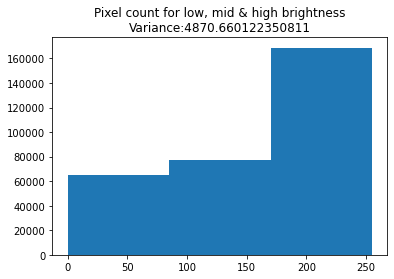

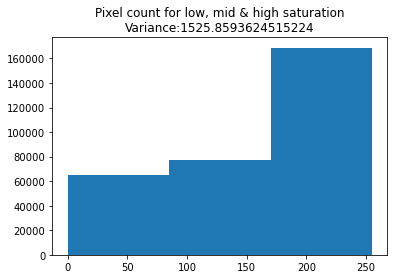

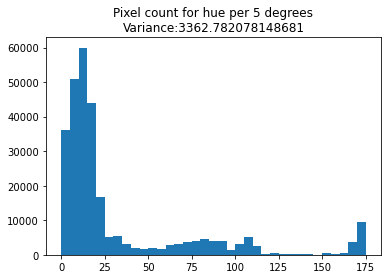

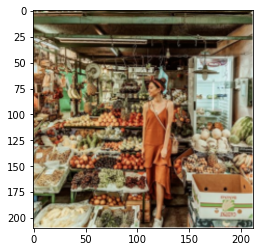

(210, 212)


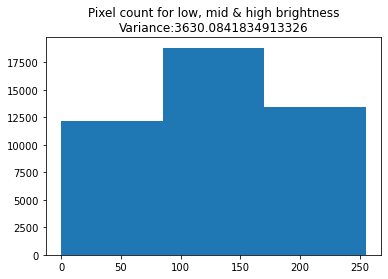

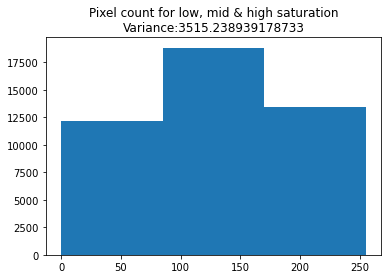

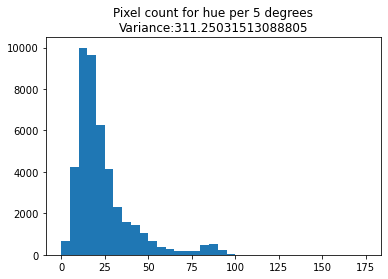

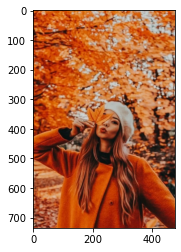

(735, 478)


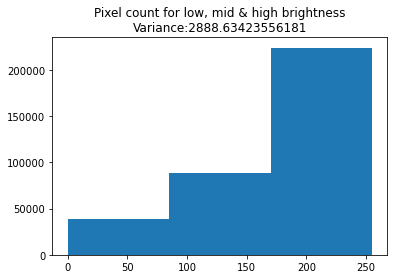

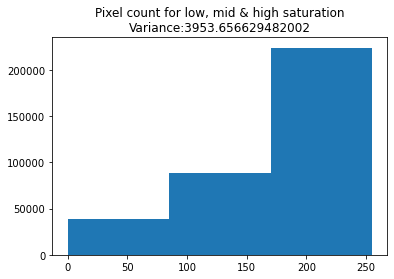

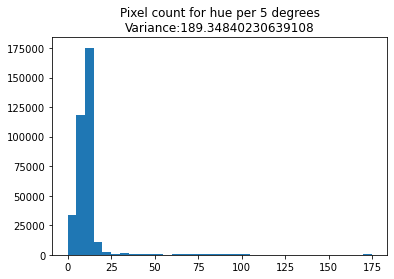

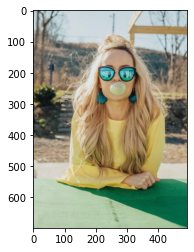

(698, 493)


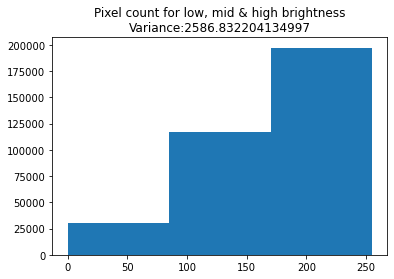

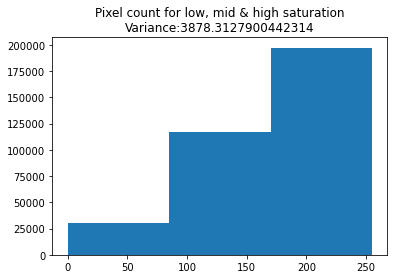

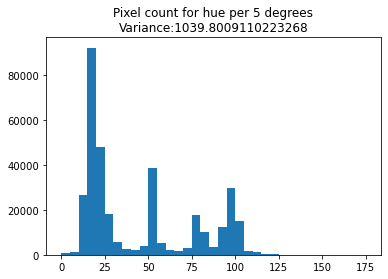

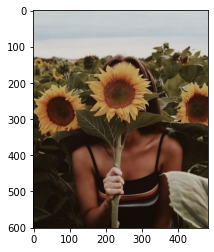

(601, 482)


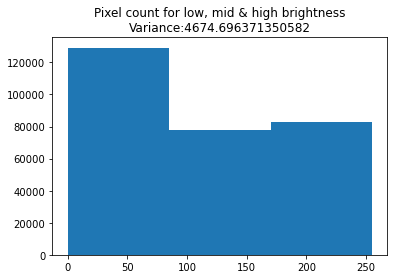

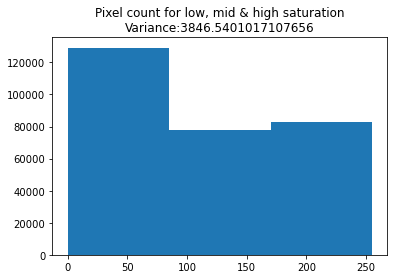

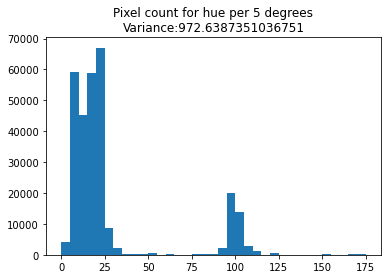

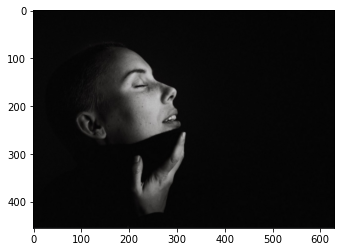

(455, 630)


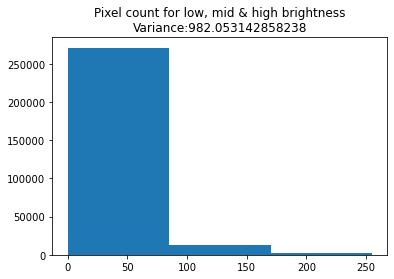

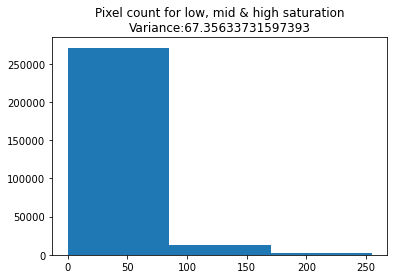

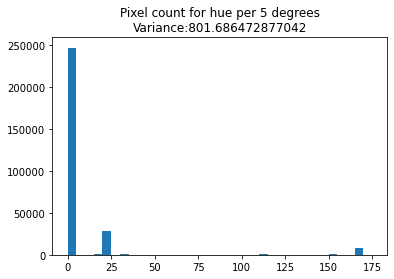

In [3]:
for i in range (1,7):
    image = cv2.imread(image_dir + f'ig_example_0{i}.PNG', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()
    calc_value_variance(image)
    calc_saturation_variance(image)
    calc_hue_variance(image)

# Difference in a color-set

[[[20 26 30]]]
[[[20  8 90]]]


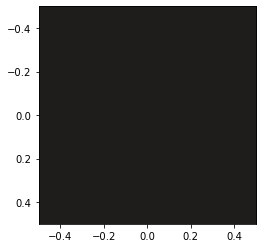

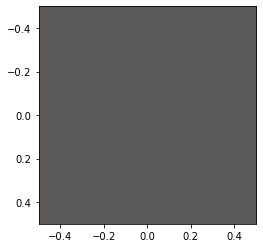

In [4]:
color1 = np.array([[[30, 29, 27]]], dtype='uint8')
color2 = np.array([[[90, 89, 87]]], dtype='uint8')
print(cv2.cvtColor(color1, cv2.COLOR_RGB2HSV))
print(cv2.cvtColor(color2, cv2.COLOR_RGB2HSV))
plt.imshow(color1)
plt.show()
plt.imshow(color2)
plt.show()


In [5]:
# convert RGB colors to L*a*b*
color1_lab = cv2.cvtColor(color1, cv2.COLOR_RGB2Lab)
color2_lab = cv2.cvtColor(color2, cv2.COLOR_RGB2Lab)

cie76(color1_lab.astype('float16').reshape(3,), color2_lab.astype('float16').reshape(3,))

70.00714249274856

In [6]:
image = cv2.imread(image_dir + f'ig_example_01.PNG', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
centers, segmented_image, labels = get_colors_in_img(image)

In [7]:
def match_colors(clusters):
    cie_threshold = 10
    matched_colors = []
    for i in range(0, len(clusters)):
        # check if color has already been matched with previous color
        if i in [x for row in matched_colors for x in row]:
            continue
        
        # add new entry of colors matched with i
        matched_colors.append([i])
        
        # if the last color hasn't been matched yet break
        if i == len(clusters) - 1:
            break
        
        # for each color after i
        for j in range(i + 1, len(clusters)):
            rgb_color_1 = cv2.cvtColor(clusters[i].reshape(1,1,3), cv2.COLOR_HSV2RGB)
            rgb_color_2 = cv2.cvtColor(clusters[j].reshape(1,1,3), cv2.COLOR_HSV2RGB)
            lab_color_1 = cv2.cvtColor(rgb_color_1.reshape(1,1,3), cv2.COLOR_RGB2Lab)
            lab_color_2 = cv2.cvtColor(rgb_color_2.reshape(1,1,3), cv2.COLOR_RGB2Lab)
            delta_e = cie76(
                lab_color_1.astype('float16').reshape(3,), 
                lab_color_2.astype('float16').reshape(3,)
            )
            
#             if (rgb_color_1.reshape(3,).tolist() == [199, 73, 9]):
#                 print(f'comparing {rgb_color_1} --> {rgb_color_2} ==== delta_e={delta_e}')

            # check if colors are similar enough and if it hasnt been added before
            if delta_e <= cie_threshold and (j not in [x for row in matched_colors for x in row]):
                matched_colors[-1].append(j)
                    
                
    return matched_colors
            

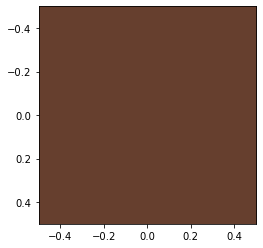

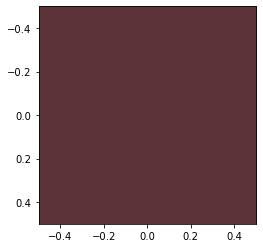

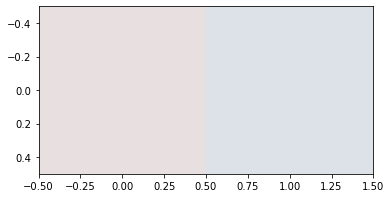

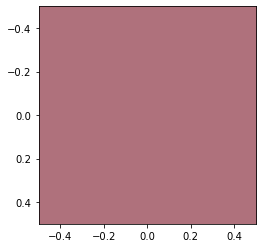

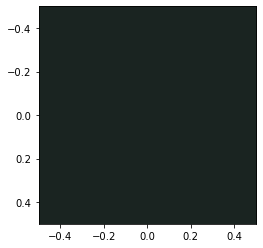

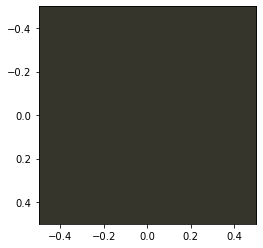

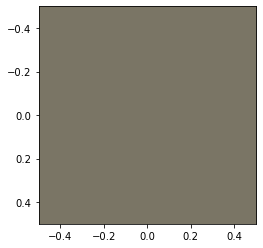

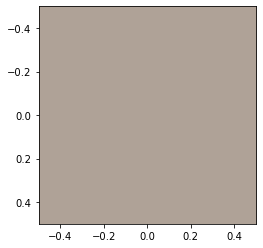

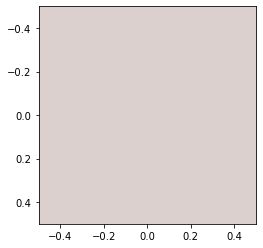

In [8]:
similair_colors = match_colors(centers)

for row in similair_colors:
    colors = []
    for item in row:
        colors.append([centers[item]])
    
    plt.imshow(cv2.cvtColor(np.array(colors).reshape(1, len(row), 3), cv2.COLOR_HSV2RGB))
    plt.show()

In [9]:
all_centers = []

for i in range (1,7):
    image = cv2.imread(image_dir + f'ig_example_0{i}.PNG', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    centers, segmented_image, labels = get_colors_in_img(image)
    all_centers.append(centers)


In [10]:
all_centers = np.array([x for row in all_centers for x in row])

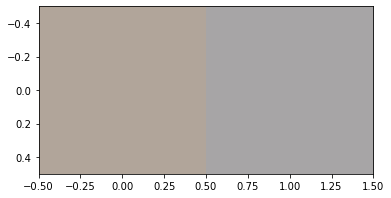

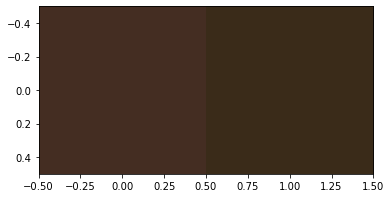

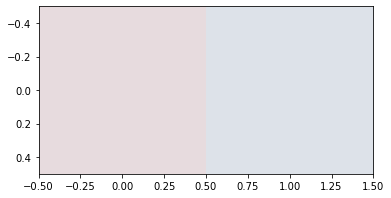

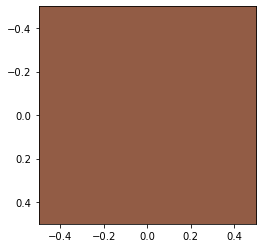

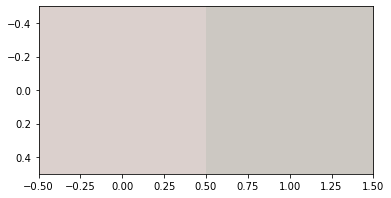

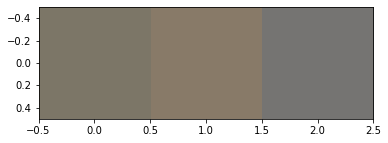

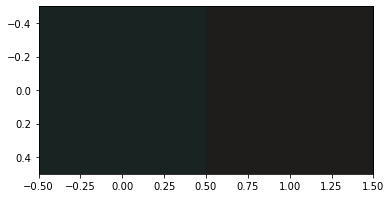

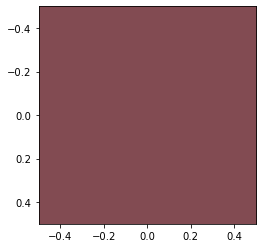

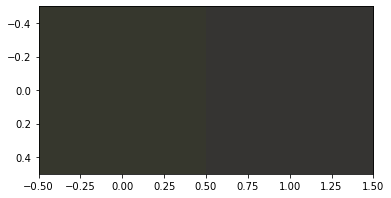

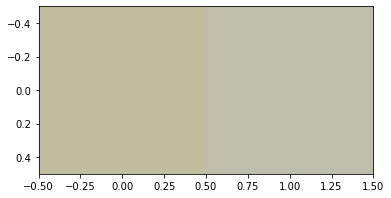

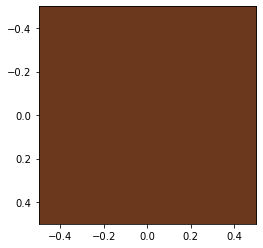

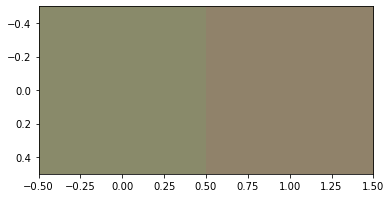

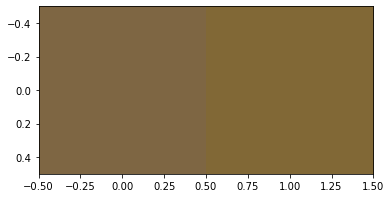

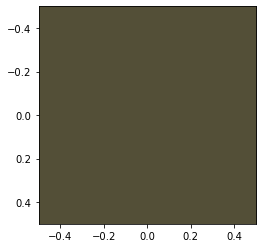

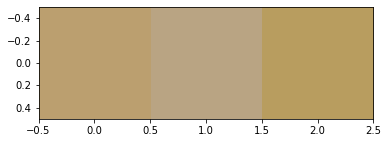

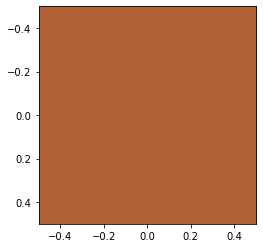

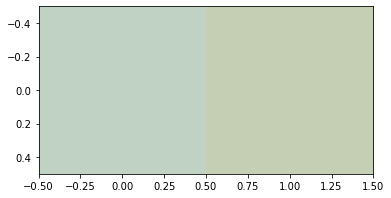

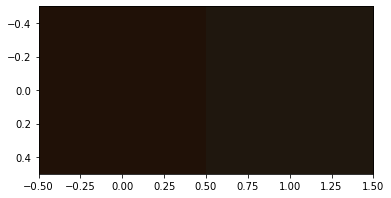

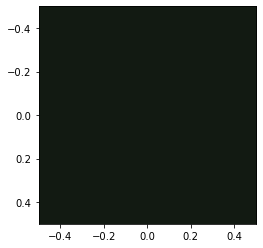

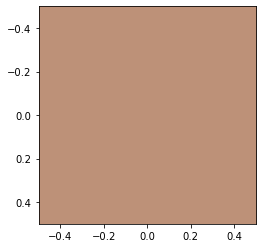

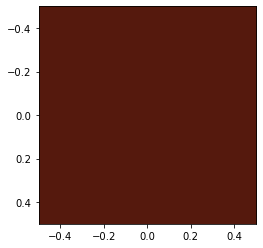

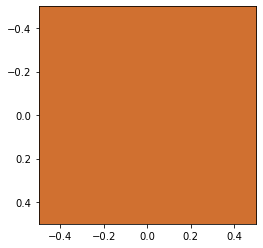

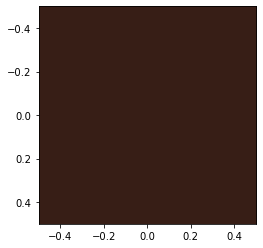

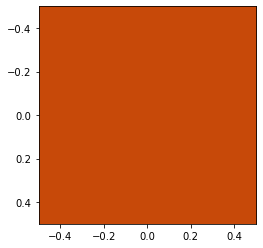

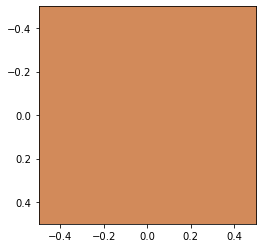

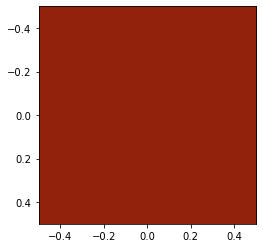

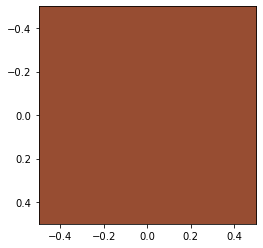

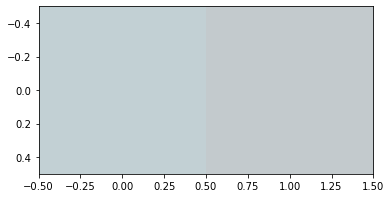

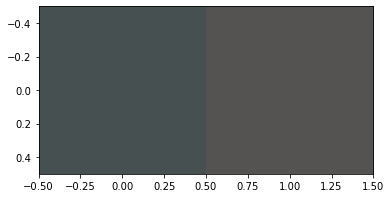

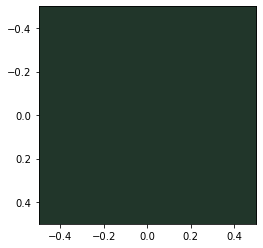

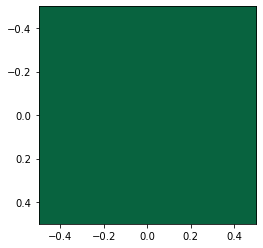

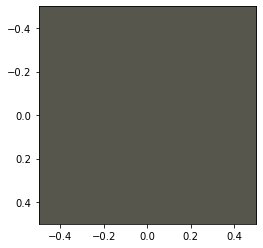

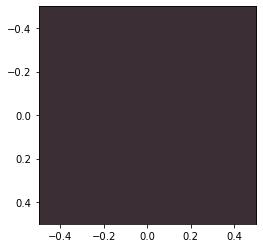

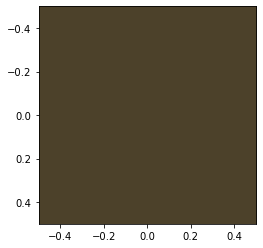

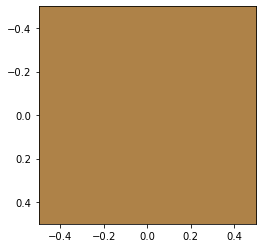

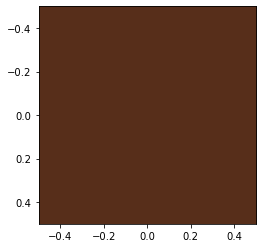

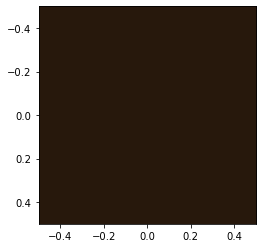

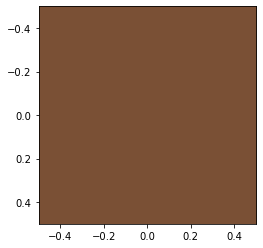

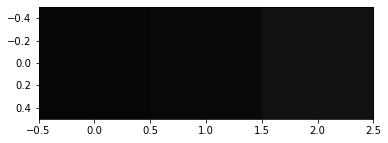

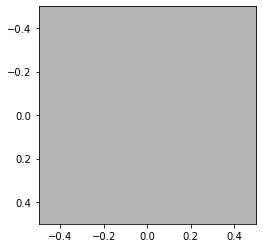

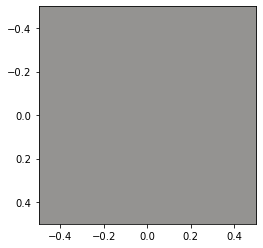

In [11]:
similair_colors = match_colors(all_centers)

for row in similair_colors:
    colors = []
    for item in row:
        colors.append([all_centers[item]])
    
    plt.imshow(cv2.cvtColor(np.array(colors).reshape(1, len(row), 3), cv2.COLOR_HSV2RGB))
    plt.show()

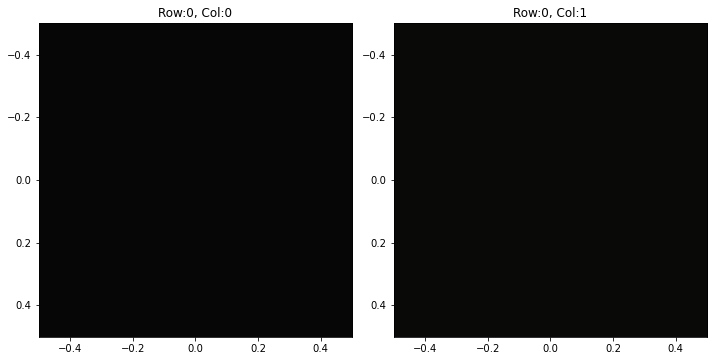

IndexError: list index out of range

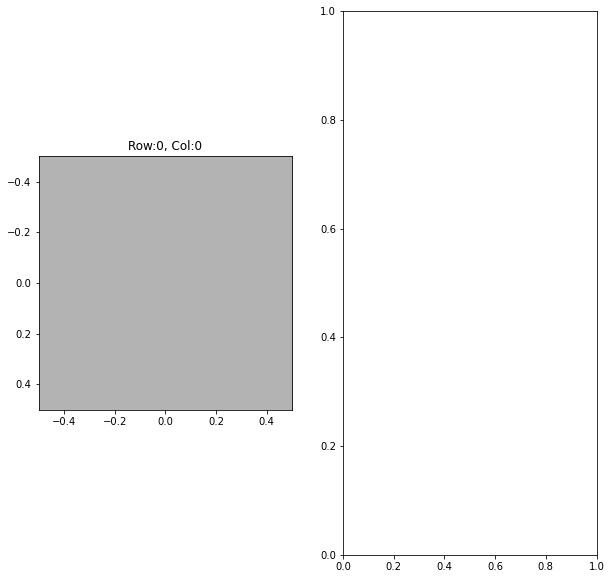

In [12]:
similair_colors = match_colors(centers)

for color_pair in similair_colors:
    nrows = 1
    ncols = 2
    # create figure (fig), and array of axes (ax)
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=[10,10])

    # plot simple raster image on each sub-plot
    for i, axi in enumerate(ax.flat):
        # i runs from 0 to (nrows*ncols-1)
        # axi is equivalent with ax[rowid][colid]
        rgb_color = cv2.cvtColor(centers[color_pair[i]].reshape(1,1,3), cv2.COLOR_HSV2RGB)
        axi.imshow(rgb_color)
        # get indices of row/column
        rowid = i // ncols
        colid = i % ncols
        # write row/col indices as axes' title for identification
        axi.set_title("Row:"+str(rowid)+", Col:"+str(colid))

    
    plt.tight_layout(True)
    plt.show()

In [ ]:
filtered_colors = []

for i in range(0, len(similair_colors) - 1):
    colors = [similair_colors[i][0]]
    for j in range(1, len(similair_colors)):
        if similair_colors[i][1] == similair_colors[j][0]:
            colors.append(similair_colors[j][1])
        
    if len(colors) > 1:
        filtered_colors.append(colors)

In [ ]:
for color_pair in filtered_colors:
    concetenated_pair = [[centers[color_pair[0]]], centers[color_pair[1]]] 
    
    nrows = 1
    ncols = len(color_pair)
    # create figure (fig), and array of axes (ax)
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=[10,10])

    # plot simple raster image on each sub-plot
    for i, axi in enumerate(ax.flat):
        # i runs from 0 to (nrows*ncols-1)
        # axi is equivalent with ax[rowid][colid]
        rgb_color = cv2.cvtColor(centers[color_pair[i]].reshape(1,1,3), cv2.COLOR_HSV2RGB)
        axi.imshow(rgb_color)
        # get indices of row/column
        rowid = i // ncols
        colid = i % ncols
        # write row/col indices as axes' title for identification
        axi.set_title("Row:"+str(rowid)+", Col:"+str(colid))

    
    plt.tight_layout(True)
    plt.show()

# Fashion Profile
Fashion, created from analysing _n_ amount of photos from a user.

- Colors: list of 3 to 10 colors
- Brightness: [mid, high, low]
- Saturation: [mid, high, low]
- Shape perception: [geometric, organic, combined]
  geometric := squares and hard edges)
  organic := rounded and irregular shapes
  combined := geometric + organic
- Shape balance: [symmetrical, unbalanced, assymetrical]